In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
import pickle
import missingno as msno
from IPython.display import display, HTML # For displaying styled HTML/CSS
import os
import joblib

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', 50)

In [374]:
df = pd.read_csv("./QS World University Rankings 2025 (Top global universities).csv", encoding='ISO-8859-1')


In [375]:
display(df.head())

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_per_Faculty_Score,Citations_per_Faculty_Rank,International_Faculty_Score,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,4,100.0,2,100.0,11,100.0,9,99.3,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,22,99.5,11,98.2,45,93.9,54,100.0,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,2,100.0,5,100.0,8,84.8,93,98.1,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,1,100.0,1,96.3,53,100.0,1,74.1,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,3,100.0,4,100.0,17,84.6,96,100.0,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7


In [376]:
display(df.columns)

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'SIZE', 'FOCUS', 'RES.', 'STATUS', 'Academic_Reputation_Score',
       'Academic_Reputation_Rank', 'Employer_Reputation_Score',
       'Employer_Reputation_Rank', 'Faculty_Student_Score',
       'Faculty_Student_Rank', 'Citations_per_Faculty_Score',
       'Citations_per_Faculty_Rank', 'International_Faculty_Score',
       'International_Faculty_Rank', 'International_Students_Score',
       'International_Students_Rank', 'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

--- Visualizing Missing Data Patterns ---


<Figure size 1200x600 with 0 Axes>

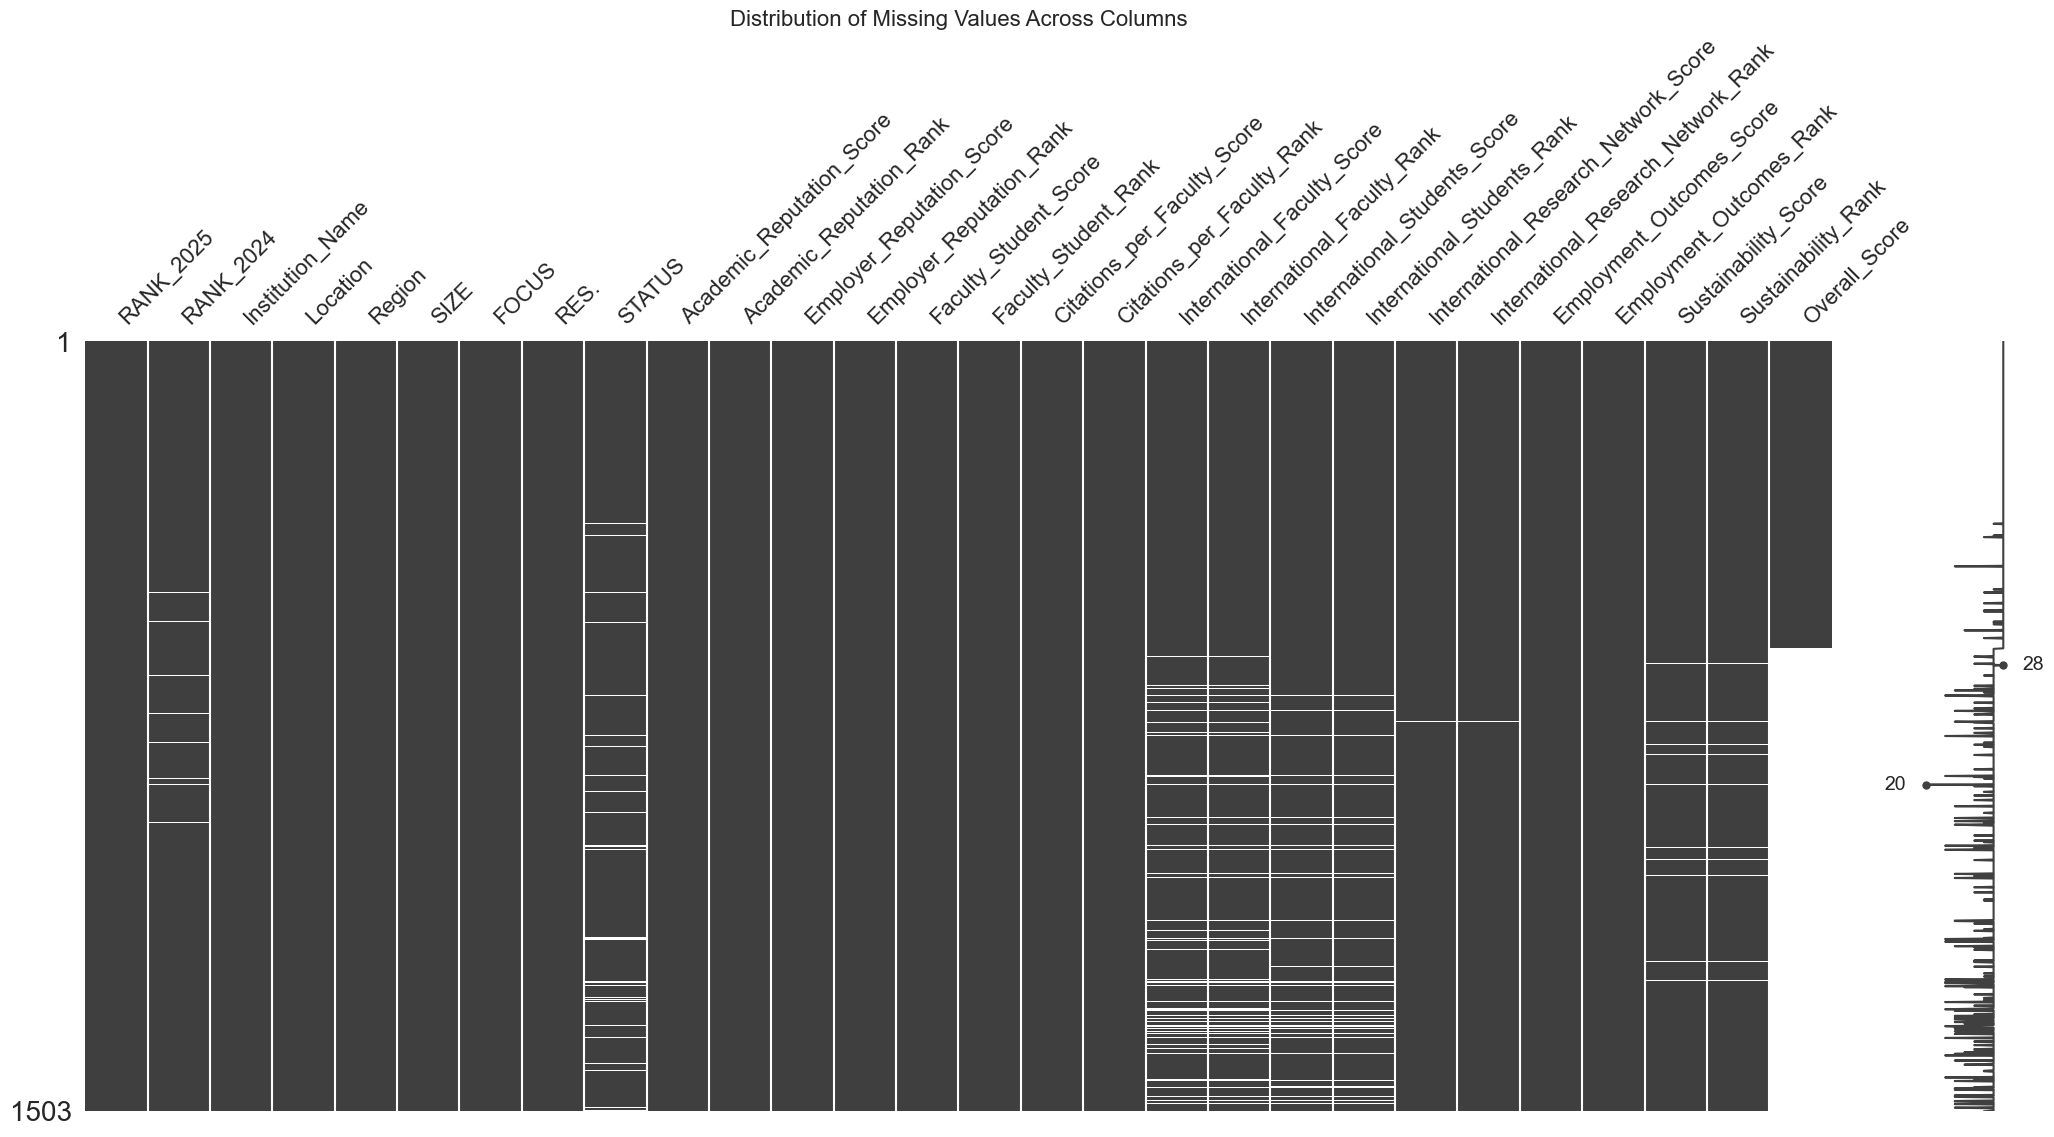

In [377]:
print("--- Visualizing Missing Data Patterns ---")

plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Distribution of Missing Values Across Columns', fontsize=16)
plt.show()

In [378]:
df.shape

(1503, 28)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

In [380]:
df.nunique()

RANK_2025                                388
RANK_2024                                378
Institution_Name                        1503
Location                                 106
Region                                     6
SIZE                                       4
FOCUS                                      4
RES.                                       4
STATUS                                     3
Academic_Reputation_Score                472
Academic_Reputation_Rank                 602
Employer_Reputation_Score                500
Employer_Reputation_Rank                 601
Faculty_Student_Score                    590
Faculty_Student_Rank                     684
Citations_per_Faculty_Score              566
Citations_per_Faculty_Rank               700
International_Faculty_Score              531
International_Faculty_Rank               681
International_Students_Score             521
International_Students_Rank              691
International_Research_Network_Score     764
Internatio

In [381]:
df.dtypes

RANK_2025                                object
RANK_2024                                object
Institution_Name                         object
Location                                 object
Region                                   object
SIZE                                     object
FOCUS                                    object
RES.                                     object
STATUS                                   object
Academic_Reputation_Score               float64
Academic_Reputation_Rank                 object
Employer_Reputation_Score               float64
Employer_Reputation_Rank                 object
Faculty_Student_Score                   float64
Faculty_Student_Rank                     object
Citations_per_Faculty_Score             float64
Citations_per_Faculty_Rank               object
International_Faculty_Score             float64
International_Faculty_Rank               object
International_Students_Score            float64
International_Students_Rank             

In [382]:
df.isnull().sum()

RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Network_Score      1
International_Research_Network_R

<Figure size 1000x800 with 0 Axes>

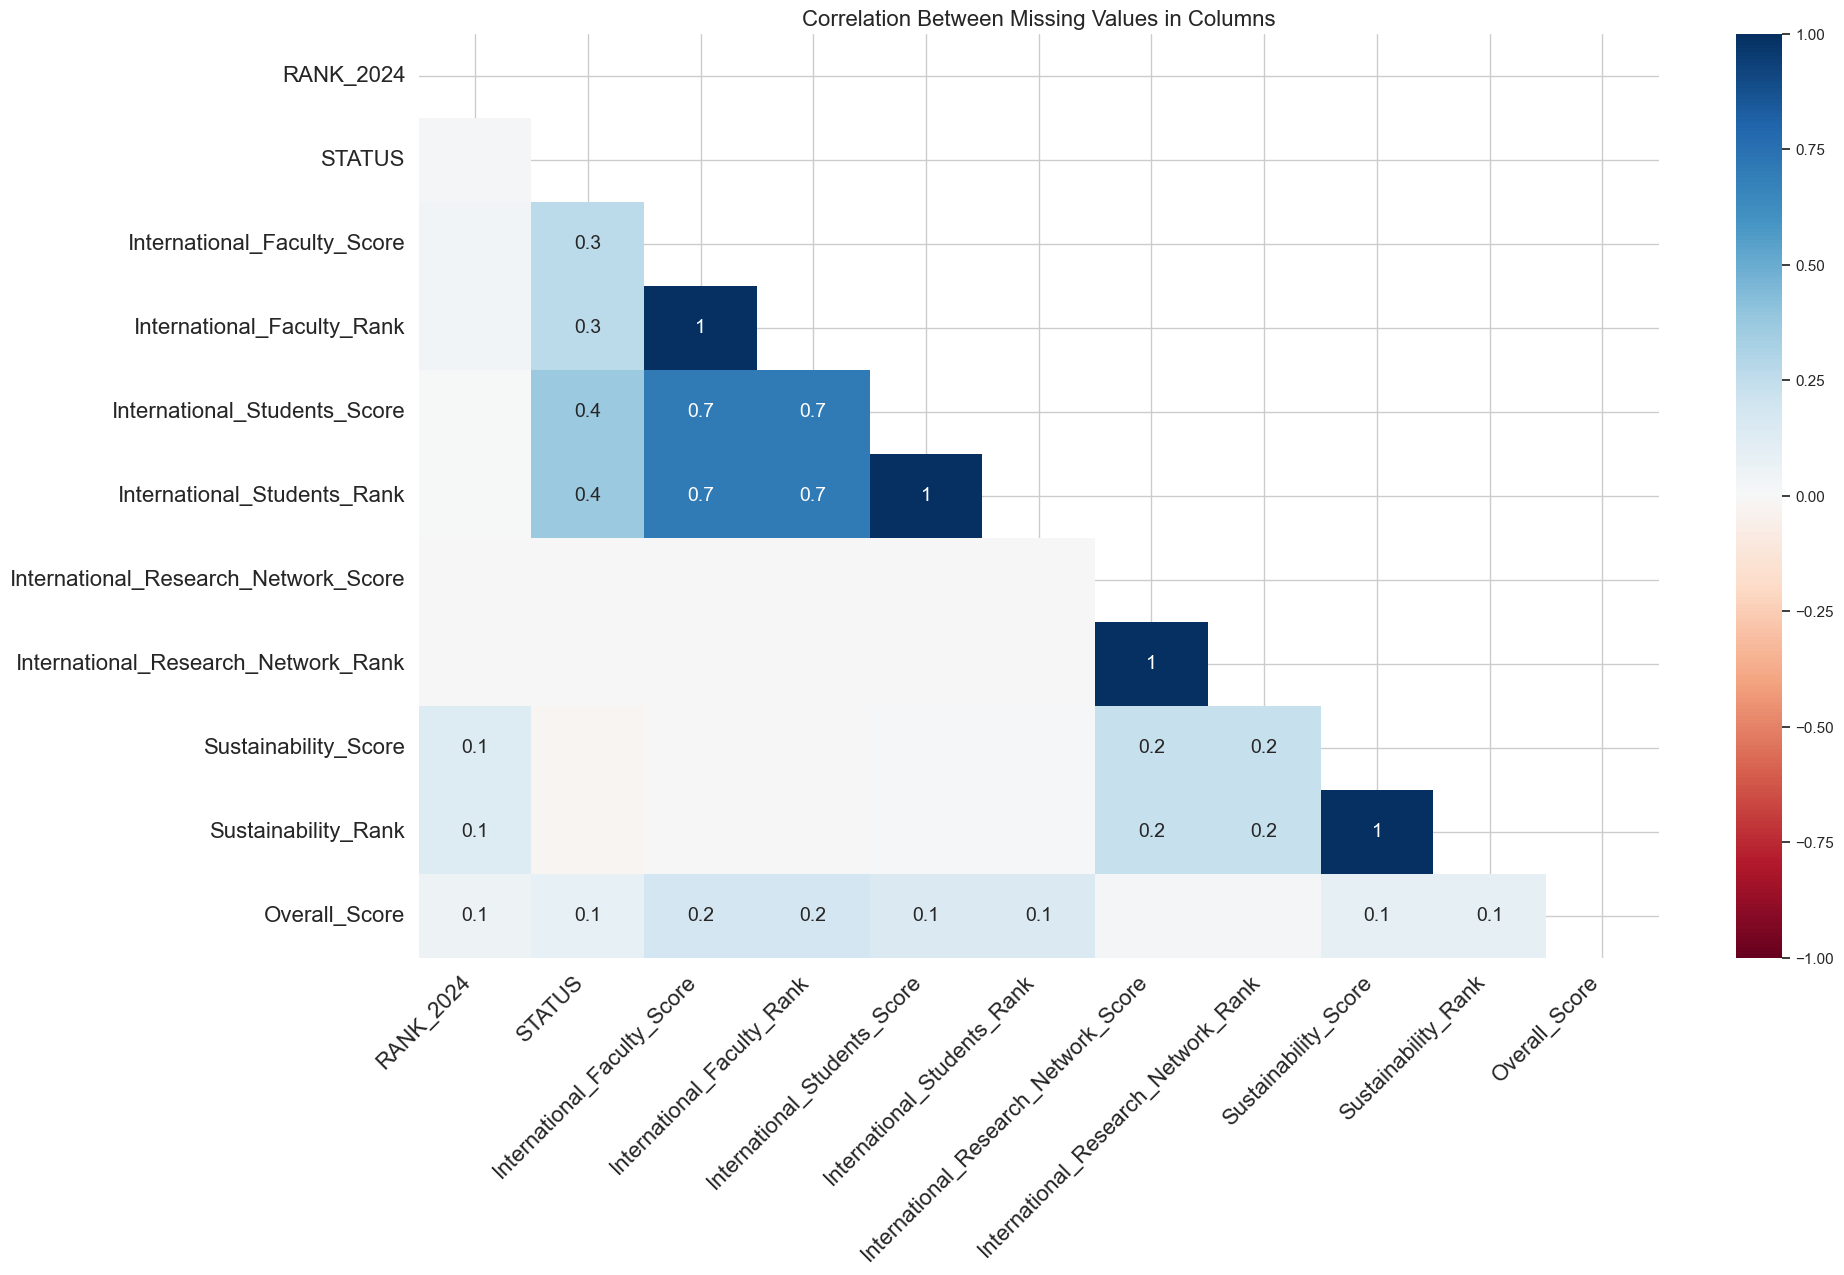

In [383]:
plt.figure(figsize=(10, 8))
msno.heatmap(df)
plt.title('Correlation Between Missing Values in Columns', fontsize=16)
plt.show()

In [384]:
# Drop rows where target value is missing (cannot train ML on NaN target)
df = df.dropna(subset=["Overall_Score"])

# Fill categorical column with mode using assignment instead of inplace
df["STATUS"] = df["STATUS"].fillna(df["STATUS"].mode()[0])

# Fill numerical score columns with mean using assignment
score_fill_cols = [
    "International_Faculty_Score", "International_Students_Score",
    "International_Research_Network_Score", "Sustainability_Score"
]
for col in score_fill_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill rank columns with a high dummy value (e.g., 999) using assignment
rank_fill_cols = [
    "RANK_2024", "International_Faculty_Rank", "International_Students_Rank",
    "International_Research_Network_Rank", "Sustainability_Rank"
]
for col in rank_fill_cols:
    df[col] = df[col].fillna(999)

# Confirm no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())


# Convert rank columns to numeric before subtraction
df["RANK_2024"] = pd.to_numeric(df["RANK_2024"], errors="coerce")
df["RANK_2025"] = pd.to_numeric(df["RANK_2025"], errors="coerce")

# Drop rows where ranks are still NaN (optional)
df = df.dropna(subset=["RANK_2024", "RANK_2025"])

# Create Rank_Change column
df["Rank_Change"] = df["RANK_2024"] - df["RANK_2025"]


# Convert to numeric (just in case)
df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors="coerce")


Missing values after cleaning:
RANK_2025                               0
RANK_2024                               0
Institution_Name                        0
Location                                0
Region                                  0
SIZE                                    0
FOCUS                                   0
RES.                                    0
STATUS                                  0
Academic_Reputation_Score               0
Academic_Reputation_Rank                0
Employer_Reputation_Score               0
Employer_Reputation_Rank                0
Faculty_Student_Score                   0
Faculty_Student_Rank                    0
Citations_per_Faculty_Score             0
Citations_per_Faculty_Rank              0
International_Faculty_Score             0
International_Faculty_Rank              0
International_Students_Score            0
International_Students_Rank             0
International_Research_Network_Score    0
International_Research_Network_Rank     0
Emp

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 599
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             574 non-null    float64
 1   RANK_2024                             574 non-null    float64
 2   Institution_Name                      574 non-null    object 
 3   Location                              574 non-null    object 
 4   Region                                574 non-null    object 
 5   SIZE                                  574 non-null    object 
 6   FOCUS                                 574 non-null    object 
 7   RES.                                  574 non-null    object 
 8   STATUS                                574 non-null    object 
 9   Academic_Reputation_Score             574 non-null    float64
 10  Academic_Reputation_Rank              574 non-null    object 
 11  Employer_Reputation

# Visualizations

In [386]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

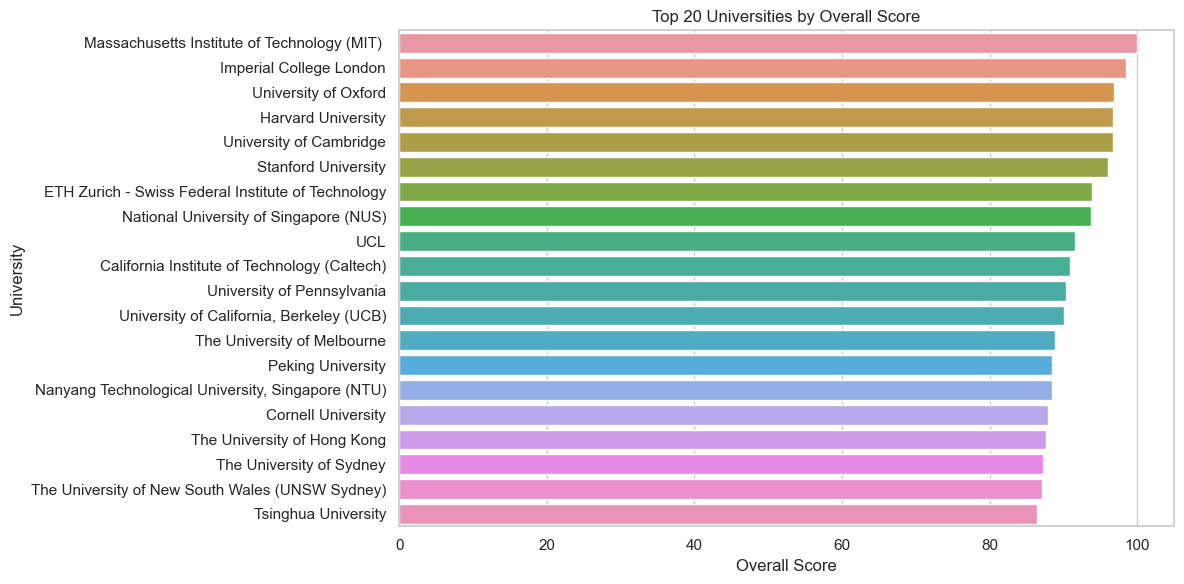

In [387]:
# Convert to numeric (just in case)
df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors="coerce")

# Sort only valid scores
top20 = df[df["Overall_Score"].notnull()].sort_values("Overall_Score", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top20, x="Overall_Score", y="Institution_Name")
plt.title("Top 20 Universities by Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.tight_layout()
plt.show()


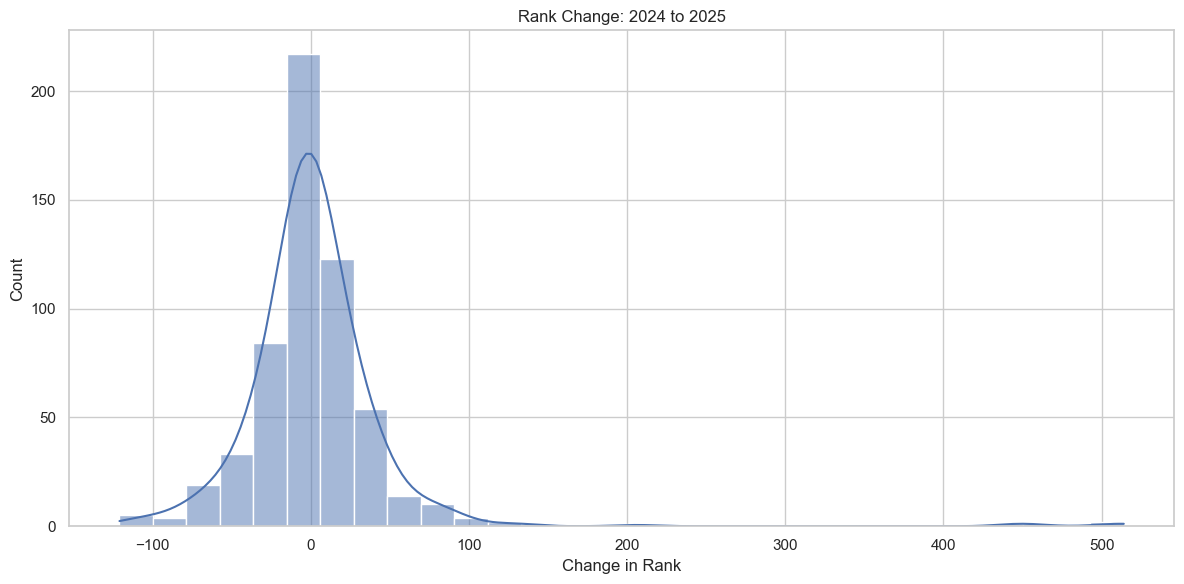

In [388]:
df["Rank_Change"] = df["RANK_2024"] - df["RANK_2025"]
plt.figure()
sns.histplot(df["Rank_Change"], bins=30, kde=True)
plt.title("Rank Change: 2024 to 2025")
plt.xlabel("Change in Rank")
plt.tight_layout()
plt.show()

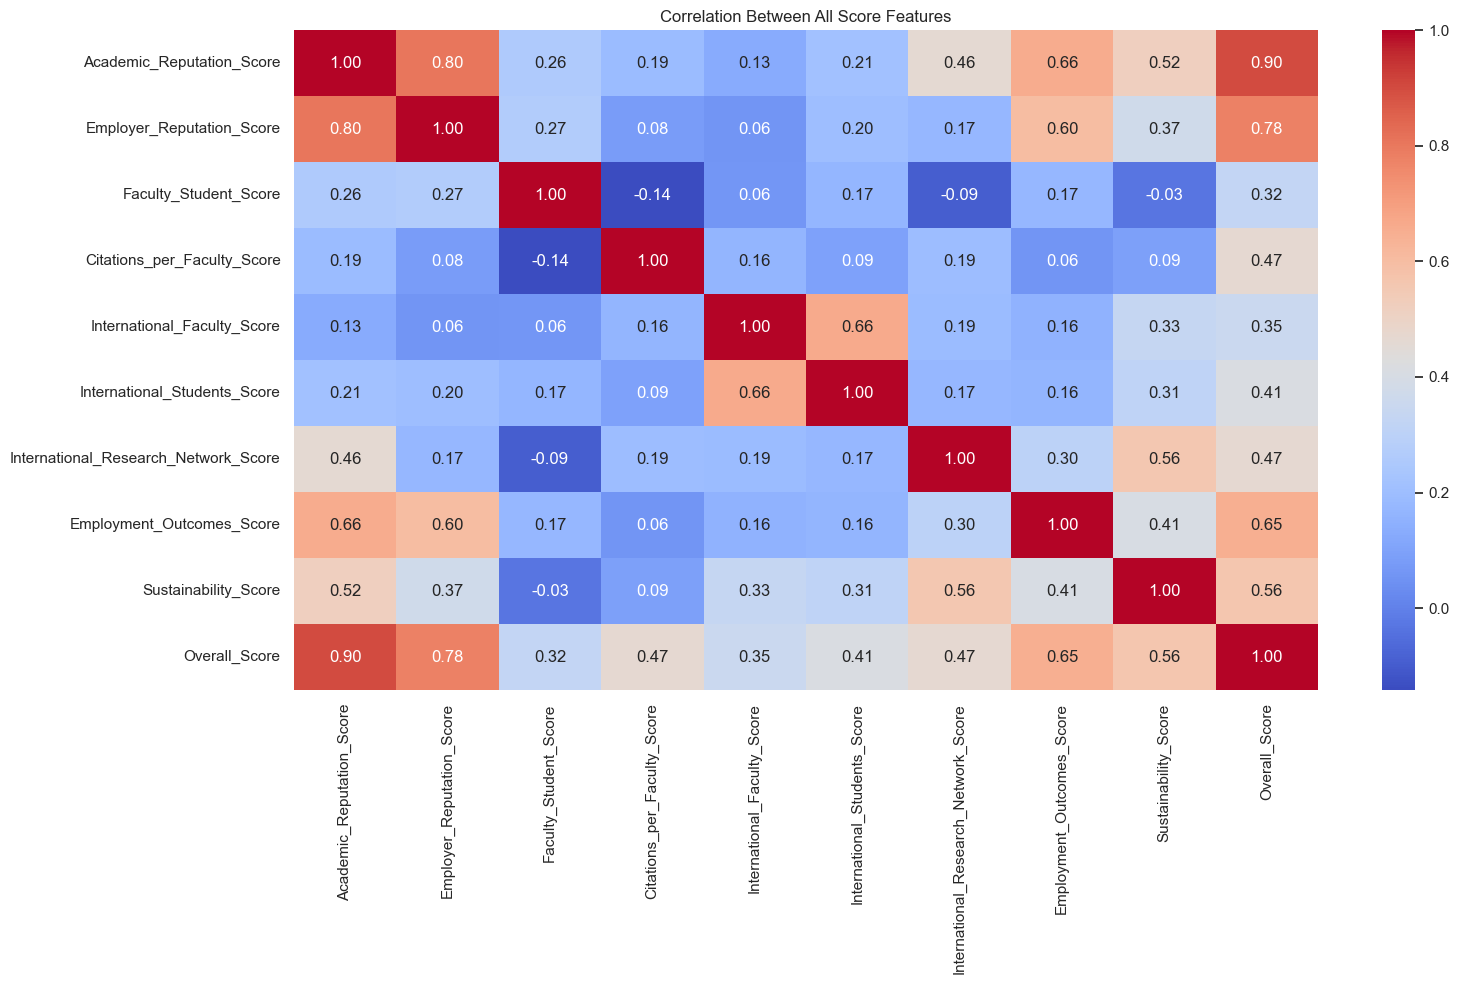

In [389]:
score_cols = df.filter(like="Score").columns
plt.figure(figsize=(16, 10))
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between All Score Features")
plt.tight_layout()
plt.show()

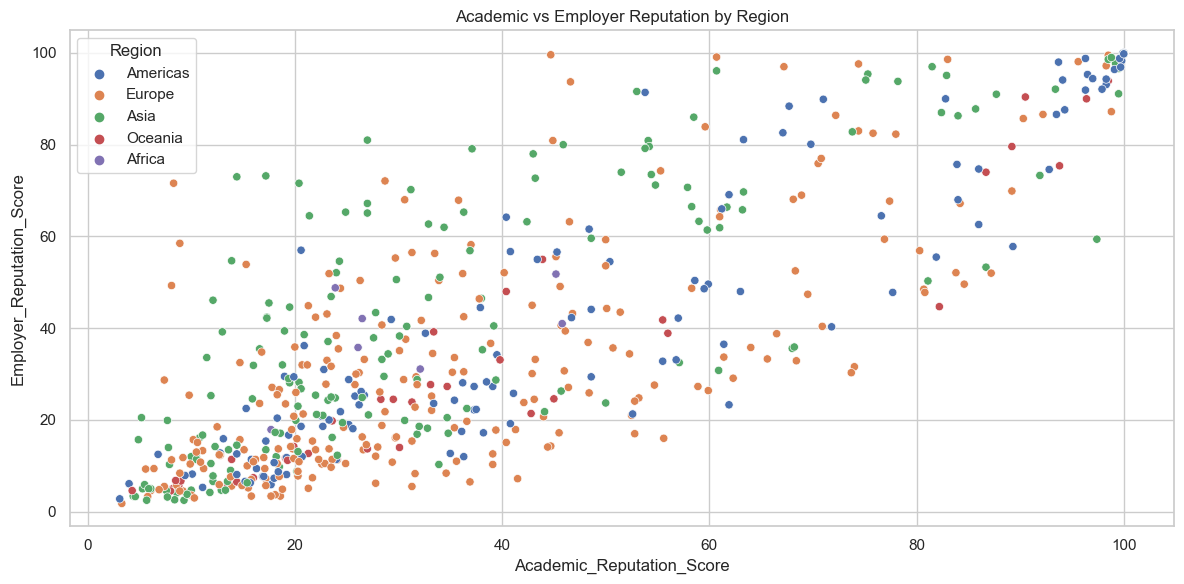

In [390]:
plt.figure()
sns.scatterplot(data=df, x="Academic_Reputation_Score", y="Employer_Reputation_Score", hue="Region")
plt.title("Academic vs Employer Reputation by Region")
plt.tight_layout()
plt.show()

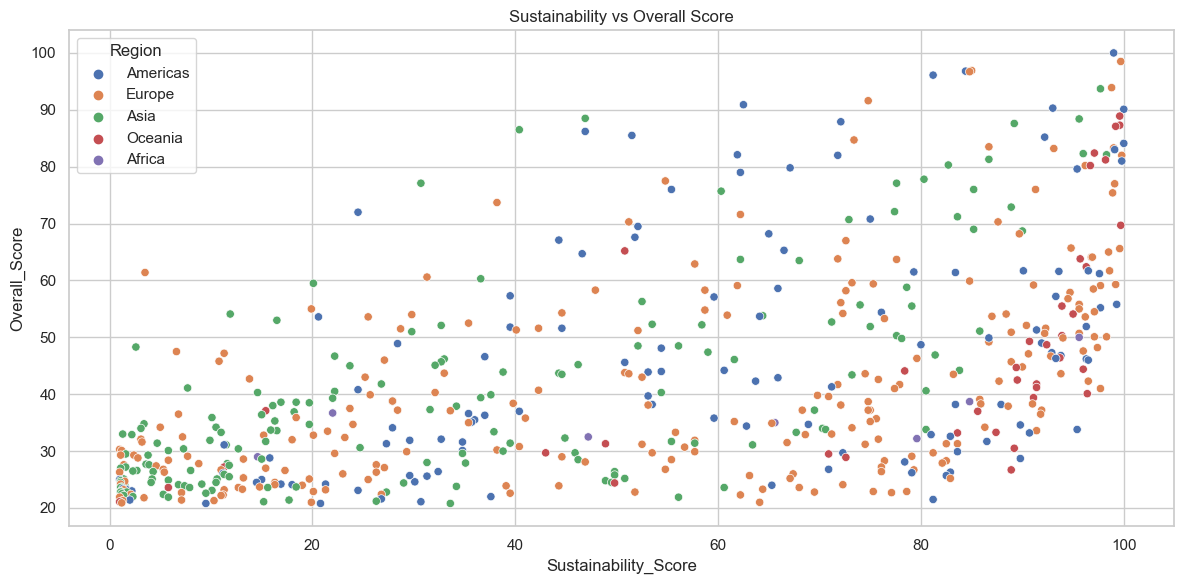

In [391]:
plt.figure()
sns.scatterplot(data=df, x="Sustainability_Score", y="Overall_Score", hue="Region")
plt.title("Sustainability vs Overall Score")
plt.tight_layout()
plt.show()

# Machine Learning Modeling & Comparison

In [392]:
df["RANK_2024"] = pd.to_numeric(df["RANK_2024"].astype(str).str.replace("+", "", regex=False), errors="coerce")
df["RANK_2025"] = pd.to_numeric(df["RANK_2025"].astype(str).str.replace("+", "", regex=False), errors="coerce")

rank_cols = [
    'Academic_Reputation_Rank', 'Employer_Reputation_Rank',
    'Faculty_Student_Rank', 'Citations_per_Faculty_Rank',
    'International_Faculty_Rank', 'International_Students_Rank',
    'International_Research_Network_Rank', 'Employment_Outcomes_Rank',
    'Sustainability_Rank'
]

for col in rank_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace("=", "", regex=False), errors="coerce")

df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors="coerce")

df = df.dropna(subset=["RANK_2024", "RANK_2025", "Overall_Score"])


In [393]:
categorical_cols = ["Location", "Region", "SIZE", "FOCUS", "RES.", "STATUS"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [394]:
df = df.dropna()

X = df.drop(columns=["Institution_Name", "RANK_2024", "RANK_2025", "Overall_Score"])
y = df["Overall_Score"]

feature_names = list(X.columns)
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [395]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=537)


In [397]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf', C=10, epsilon=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

Model LinearRegression saved to models/LinearRegression_model.pkl


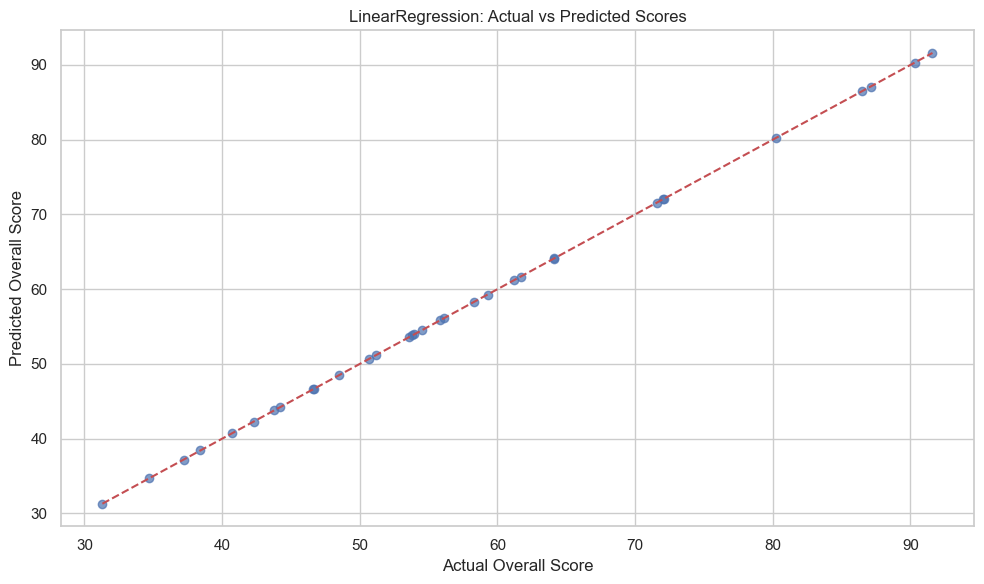

Model Ridge saved to models/Ridge_model.pkl


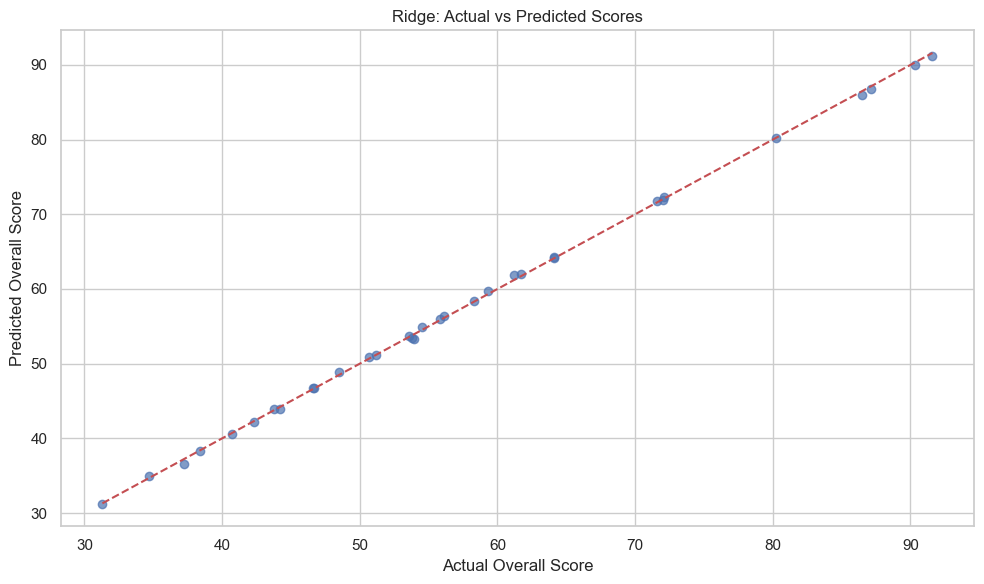

Model Lasso saved to models/Lasso_model.pkl


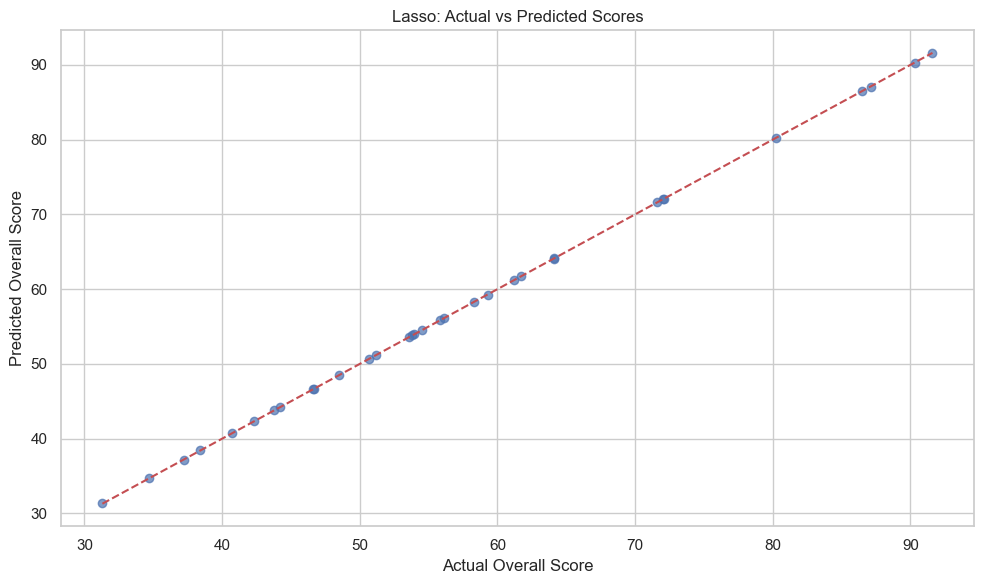

Model KNN saved to models/KNN_model.pkl


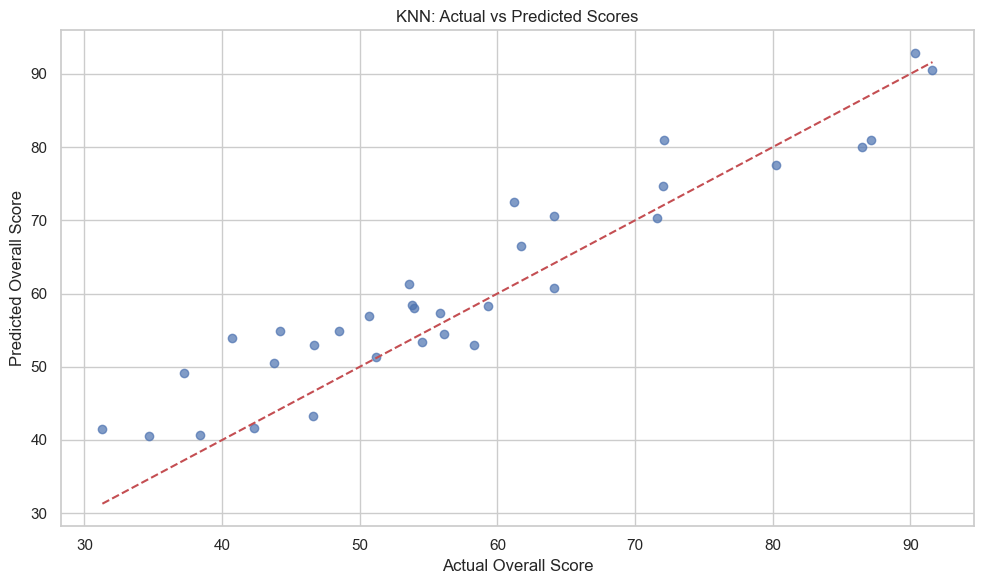

Model SVR saved to models/SVR_model.pkl


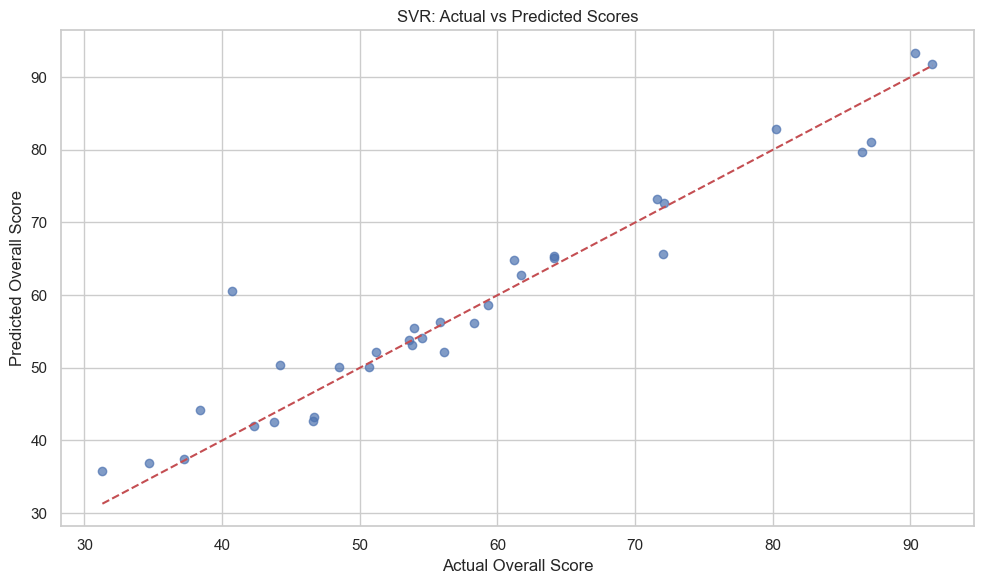

Model RandomForest saved to models/RandomForest_model.pkl


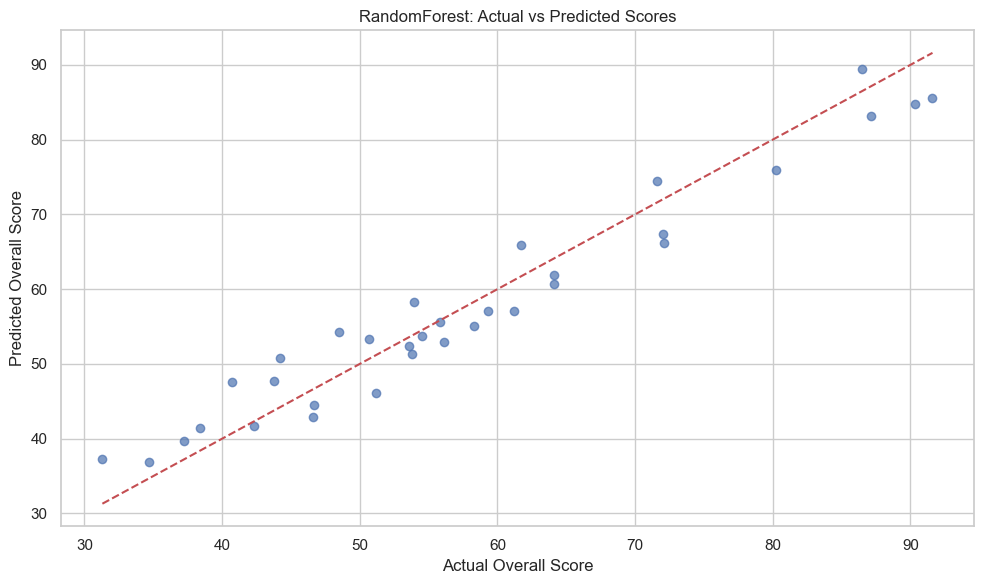

Model GradientBoosting saved to models/GradientBoosting_model.pkl


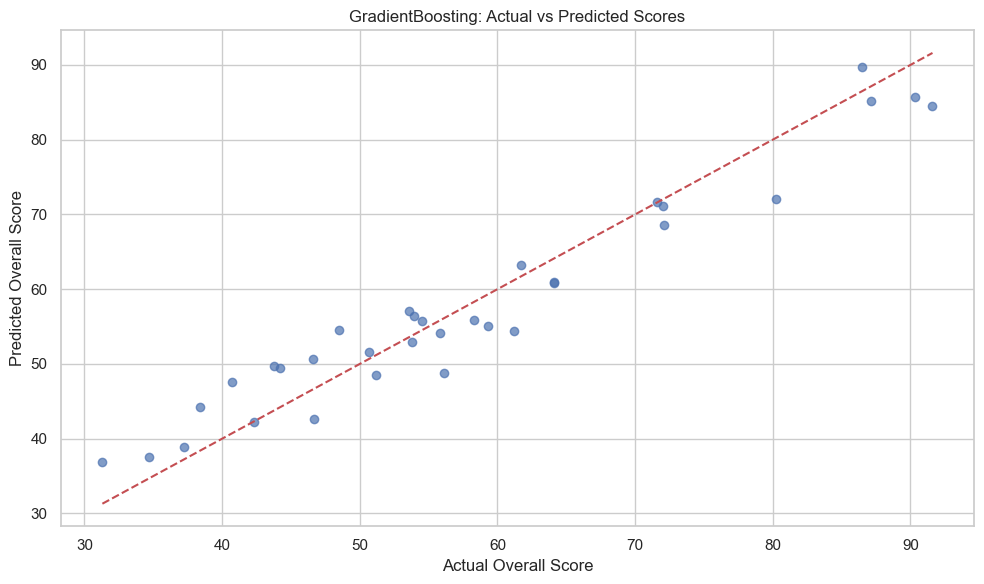

In [398]:
results = []
os.makedirs('models', exist_ok=True)
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append((name, r2, mse, rmse))
    
    model_path = os.path.join('models', f"{name}_model.pkl")
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    
    print(f"Model {name} saved to {model_path}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Overall Score')
    plt.ylabel('Predicted Overall Score')
    plt.title(f'{name}: Actual vs Predicted Scores')
    plt.tight_layout()
    plt.show()

In [399]:
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "MSE", "RMSE"]).sort_values(by="R2_Score", ascending=False)
results_df

,Model,R2_Score,MSE,RMSE
0,LinearRegression,0.999996,0.001079,0.032843
2,Lasso,0.999992,0.002181,0.046705
1,Ridge,0.999651,0.090147,0.300245
5,RandomForest,0.938467,15.911768,3.988956
6,GradientBoosting,0.929891,18.129514,4.257877
4,SVR,0.917246,21.399282,4.625936
3,KNN,0.850719,38.602412,6.213084


In [400]:
def simple_dense():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

def deep_dense_dropout():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

def regularized_dense():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.0005), loss='mse', metrics=['mae'])
    return model

Model Simple_Dense saved to models/Simple_Dense_model.h5


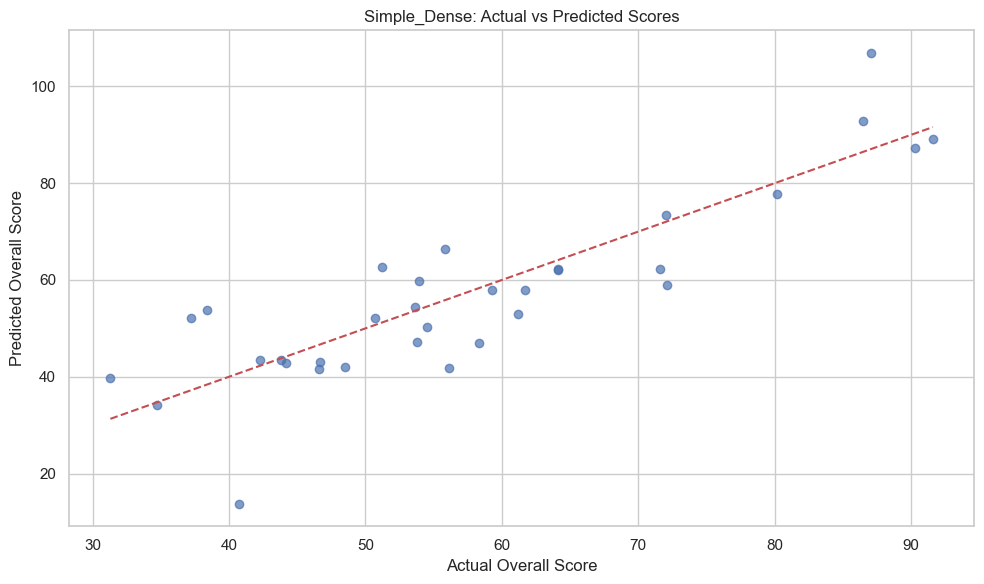

Model Deep_Dense saved to models/Deep_Dense_model.h5


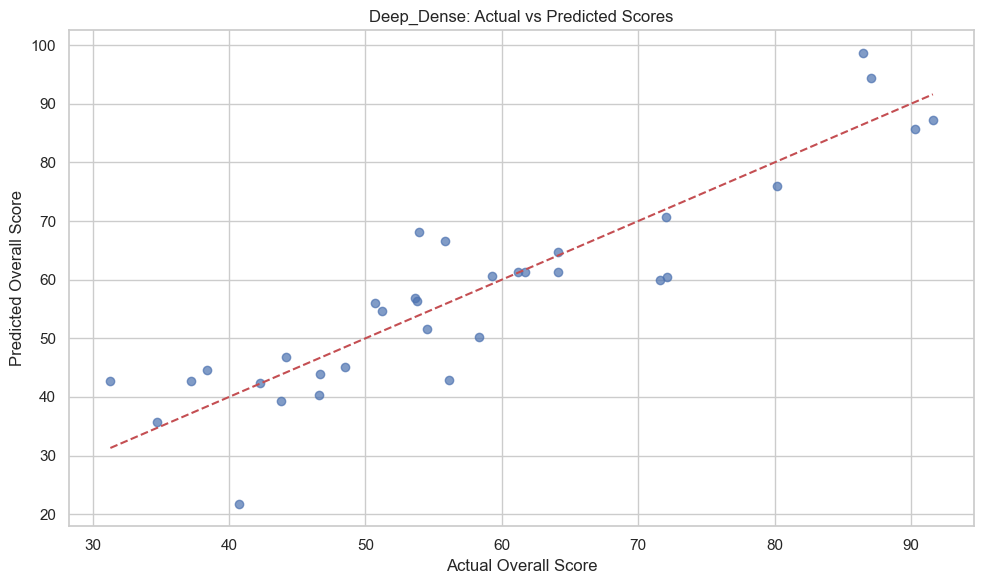

Model Regularized_Dense saved to models/Regularized_Dense_model.h5


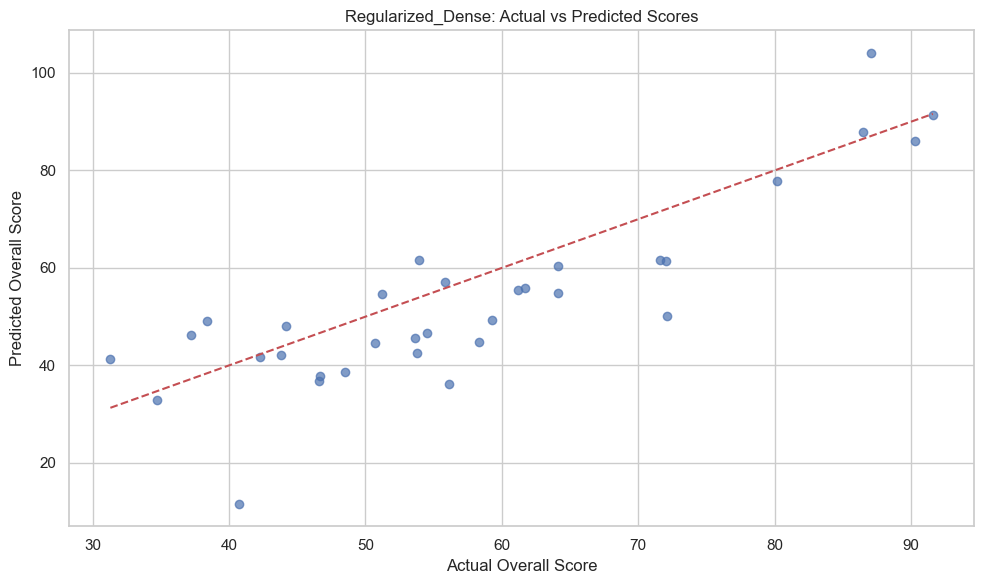

In [401]:
dl_models = {
    "Simple_Dense": simple_dense(),
    "Deep_Dense": deep_dense_dropout(),
    "Regularized_Dense": regularized_dense()
}

dl_results = []
for name, model in dl_models.items():
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    dl_results.append((name, mae))

    model_path = os.path.join('models', f"{name}_model.h5")
    model.save(model_path)
    print(f"Model {name} saved to {model_path}")
    
    y_pred = model.predict(X_test).flatten() 

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Overall Score')
    plt.ylabel('Predicted Overall Score')
    plt.title(f'{name}: Actual vs Predicted Scores')
    plt.tight_layout()
    plt.show()

In [402]:
dl_df = pd.DataFrame(dl_results, columns=["DL_Model", "Test_MAE"]).sort_values(by="Test_MAE")
dl_df

,DL_Model,Test_MAE
1,Deep_Dense,5.720979
0,Simple_Dense,6.851562
2,Regularized_Dense,8.381104


In [403]:
def predict_single_model(new_data, model_path='models/LinearRegression_model.pkl', scaler_path='scaler.pkl', features_path='feature_names.pkl'):
    # Load scaler
    scaler = joblib.load(scaler_path)
    
    feature_names = joblib.load(features_path)
    
    model = joblib.load(model_path)
    
    new_df = pd.DataFrame([new_data])
    
    for feature in feature_names:
        if feature not in new_df.columns:
            new_df[feature] = 0

    new_df = new_df[feature_names]
    
    # Scale the new data
    new_scaled = scaler.transform(new_df)
    
    # Make prediction
    predicted_score = model.predict(new_scaled)[0]
    
    return predicted_score

In [404]:

new_university = {
    "Academic_Reputation_Score": 85.0,
    "Employer_Reputation_Score": 80.0,
    "Faculty_Student_Score": 75.0,
    "Citations_per_Faculty_Score": 70.0,
    "International_Faculty_Score": 65.0,
    "International_Students_Score": 60.0,
    "International_Research_Network_Score": 75.0,
    "Employment_Outcomes_Score": 80.0,
    "Sustainability_Score": 85.0,
    "Location": 10,
    "Region": 2,
    "SIZE": 1,
    "FOCUS": 0,
    "RES.": 2,
    "STATUS": 1
}

predicted_score = predict_single_model(new_university)
print(f"Predicted Overall Score: {predicted_score:.2f}")


Predicted Overall Score: 77.79
